# Most Profitable Movie Types, Top Movie Studios and Production Crews.

## Business Undestanding
***
### a) Introduction
Film production began in 1900 by [Charles Pathé](https://en.wikipedia.org/wiki/Charles_Path%C3%A9), while the first film theatre to be introduced was "The Nickelodeon" in Pittsburgh(United States) 1905. Since then, film production and theaters have increased spontaniously till the 20th centuary, where film industry worldwide has revenue of around 77B ([Statista](https://www.statista.com/topics/5431/film-production-worldwide/#topicOverview)).The revenue genereted from Movies is usually accumulated from the following sources ;
- Merchandising
- Television Broadcats
- Home video
- Theatre Exhibitions.

However, out of all these sources theatre exhibitions (aka box office) is the most used measure to asses the  the success of a movie, because of data availability compared to the other revenue sources.
Movies produced are usually categorised according to the style, theme or scenes associated with the movie, such categories are called **genres**, few examples of movie genres are **Actio, Thriller, Drama, Horror and Comedy**.  

### b) Problem Statement

In light with the high revenues accrued by the film industry over the years, which is forcasted to keep on rasing , has made movie studios to accumulate high profits from movie production in for of reveue.  As a result Microsoft, a renowned multinational software production company, has decided to tap into the profits and venture into movie production by become a competitive movie production studio. To address this we will be investigating the best selling movie types in the box offices and the production line Microsoft should aline with in order to top the tables as one of the best movie studio in the recent future.

### c) Main Objective

Our main problem, in this project, is to investigate the best selling movie types, the best movie production crews and the top movie production studios.


### d) Metric for Success
To provide actionable insights on profitable movie types to venture into and lists of best rated production crews and top movie production studios that Microsoft can use in its new studio.


### e) Specific Objectives

* To identify the movie genres / types that produce high gross income in box offices that Microsoft studio can specialise in production  

* To list the top professionals ( Producers, Actors, Directors) who can be  considered for hire, and are linked to the most  high grossed movies

* To list the best movie production studios that have a  movie gross incomes that Microsoft studio could partner with in production
 

## Data Understanding
***
The datasets used in this project were sourced from various movie databases and website such as [TheMovieDB](https://www.themoviedb.org/) , [IMDB](https://www.imdb.com/) and [Rotten Tomatoes](https://www.rottentomatoes.com/). They contain various attributes of intrests such as movie: ***titles , gross sales , production studios , year of production , produers , actors*** and **directors*** .  
The datasets that have been used are;
> The `bom.movie_gross.csv`, where each row represents a particular movie and its corresponding attribute. The data set contains 3387: movies and 5: movie atributes which include; `title`, `studio`, `domestic_gross`, `foreign_gross` and `year`.

> The `im.db` is SQLite database of IMDB data, that contain diferent tables that are link together using primary and foreign keys. Each table contains different movie attributes corresponding to particular movie titles  found in the `movie_basics` table. 

Below is the IMDB movie database Entity Relationship Diagram(ERD) showing how the different tables are linked.
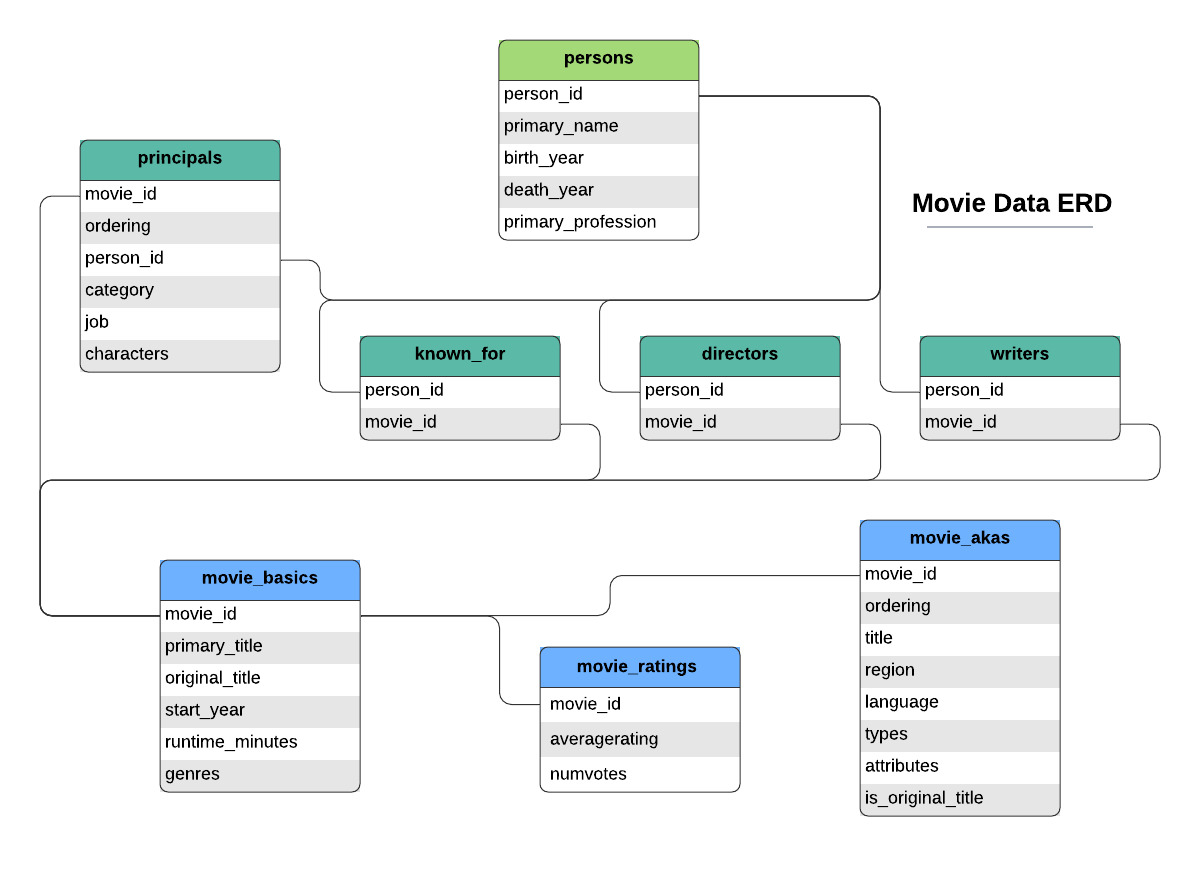

From this `im.db` database we are going to create two tables which will contain the requred attrubutes:

>- `movie_basics` table, which is a join of the `movie_basics` and `movie_ratings` tables and will have the following attributes {`movie_id`, `runtime_minute`, `primary_title` and `genres`}

>- `persons` table, which is a join of the  `persons` and `principlas` tables inorder to have the following attributes {`person_id` , `primary_name`, `movie_id` and  `category`}


## Data Preparation

Here we are goin to extract the various table that are going to answer the bussiness question and undertake data cleaning to prepair them for analysis. The various data cleaning methods that to be used will be;
- Checking and removing duplicates
- Dealing with missing data
- Checking and dealing with missing data in form of place holders

Other data cleaning techniques like droping unwanted rows, grouping data and pivot tables are going to be undertaken during data analysis at specific business problems


In [1]:
#importing all the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

#creating an SQLite server connection to the im.db databsaeb
conn=sqlite3.connect('data/im.db')


### The `bom.movie_gross.csv` Dataset
First we will start with the data preparation with the `bom.movie_gross.csv` dataset, where we read it as `movie_gross` dataframe and check for missing values, duplicates and placeholders.

In [2]:
# Reading the `bom.movie_gross dataset` as `movie_gross` dataframe

movie_gross=pd.read_csv('data/bom.movie_gross.csv')
print(movie_gross.shape)
movie_gross.head()

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Checking for duplicates

print(movie_gross.duplicated().sum())

#there are no duplicates

0


In [4]:
#hecking for missing data
print(movie_gross.info())

movie_gross.isna().sum()/len(movie_gross)

# domestic_gross column has 28 missing values corresponding to 0.8%
# foreign_gross column has 1350 missing values which corresponds to 40% of the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


title             0.000000
studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

In [5]:
# Dealing with the missing values, by droping the missing values in both `domestic_gross` and `foreign_gross` columns

#Droping rows with missing data in the `foreign_gross` and `domestic_gross` columns
movie_gross.dropna( subset=['domestic_gross','foreign_gross'], inplace=True)

In [6]:
#converting the foreign_gross column into float dtype  by removing the ',' characters and coersing to float
movie_gross.foreign_gross = movie_gross.foreign_gross.map( lambda x: float(x.replace(',','')))

#confirming the above steps
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   float64
 4   year            2009 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.2+ KB


In [7]:
#we create a new coulmn called gross = domestic_gross + foreign_gross

movie_gross['gross']=movie_gross.domestic_gross + movie_gross.foreign_gross

# dropping the old columns
movie_gross.drop(['domestic_gross','foreign_gross'], axis=1, inplace= True)


In [8]:
#dropping the year column beacause its not going to be used in analysis

movie_gross.drop(['year'], axis=1, inplace= True)

#confurming our changes
movie_gross.columns

Index(['title', 'studio', 'gross'], dtype='object')

In [9]:
#checking for extraneous values (missing data represented by placeholders) from all the columns of our movie_gross dataset
# exept title column

for col in movie_gross.columns[1:]:
    print(col, '\n', movie_gross[col].value_counts(normalize=True).head(), '\n\n')
    
    
# there are no missing data represented by placeholders

studio 
 Uni.    0.071749
Fox     0.066766
WB      0.064773
Sony    0.052317
BV      0.051819
Name: studio, dtype: float64 


gross 
 7900000.0     0.002489
27400000.0    0.002489
15400000.0    0.002489
16900000.0    0.002489
43000000.0    0.001991
Name: gross, dtype: float64 




In [10]:
# Examining the various descriptive statistics of the movie_gross dataset
movie_gross.describe()

,gross
count,2.009000e+03
mean,1.226913e+08
std,2.074870e+08
min,4.900000e+03
25%,8.141000e+06
50%,4.230000e+07
75%,1.337000e+08
max,1.518900e+09


> The `gross` column has a **mean**: 122,810,200 , **Standar deviation**:207,556,200 and a **median**:42,400,000, which suggest presence of positive skewness


### The `im.db`  Database
Next, we are going to extract the required attributes and tables from the `im.db` database and prepair them for analysis. 
The fisrt table to extract will be the `movie_basics` table that contains the required movie attributes like; `primary_title`, `runtime_minute` , `genres` and `movie_id`.

In [11]:
#Writing an sql query to extract the movie_basics table

q=""" 
SELECT 
        movie_id,
        primary_title, 
        runtime_minutes,
        genres
FROM movie_basics        
;
"""
movie_basics=pd.read_sql(q,conn) 
print(movie_basics.shape)
movie_basics.head()                


(146144, 4)


,movie_id,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"


In [12]:
#checking the structure of the table's columns 
movie_basics.info()

#The all columns are of required dtype 
#The runtime_minutes column have missing values
# since it is not a major varibles in our analysis we will leave it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   runtime_minutes  114405 non-null  float64
 3   genres           140736 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.5+ MB


The second table to extract will be called `persons`table, it will contain information about different film crew i.e (actors, producers, writers and actresses) and their corresponding attributes such as their; **name** , **category** and **movie produced**.

The table will be an <span style='color:red'>  inner </span> join of the `persons` table and the `principals` table so as to get only the persons we have full information of from the two tables. This joining is a <span style='color:red'> one - to - many  </span>  relationship since one profession can be linked to several movie titles.


In [13]:
#writting the  sql query for creating the persons table
q="""
SELECT 
        p.primary_name,
        p.person_id,
        pp.movie_id,                   
        pp.category
FROM persons AS p
INNER JOIN principals AS pp   ---Using inner joint so as to get persons who we have full details on
        USING(person_id)

WHERE p.death_year IS NULL     -- selecting only the professionals that are alive     

;
"""

persons=pd.read_sql(q,conn)
print(persons.shape)
persons.head()



(1016069, 4)


,primary_name,person_id,movie_id,category
0,Mary Ellen Bauder,nm0061671,tt2398241,producer
1,Joseph Bauer,nm0061865,tt0433397,composer
2,Joseph Bauer,nm0061865,tt1681372,composer
3,Joseph Bauer,nm0061865,tt2281215,composer
4,Joseph Bauer,nm0061865,tt2387710,composer


In [14]:
#checking for missing values
print(persons.isna().sum())
persons.info()

#the variables ar of required data type


primary_name    0
person_id       0
movie_id        0
category        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016069 entries, 0 to 1016068
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   primary_name  1016069 non-null  object
 1   person_id     1016069 non-null  object
 2   movie_id      1016069 non-null  object
 3   category      1016069 non-null  object
dtypes: object(4)
memory usage: 31.0+ MB


In [15]:
#checking the category of professionals our data has 
persons.category.unique()

array(['producer', 'composer', 'actor', 'cinematographer',
       'production_designer', 'director', 'actress', 'writer', 'editor',
       'self', 'archive_footage', 'archive_sound'], dtype=object)

## Data Analysis

In this section we are going to use the extracted and prepaired tables to solve our main problem through the various business questions.
We wil start with the first business question;

> ###   1: Which  movie genres has the highest gross income 

To solve this problem we will merge both the `movie_basics` table ( which has the `domestic_gross`, `foreign_gross` columns)  and the `movie_gross` ( which has the `genres` column) table so as to come up with a table with the required variables ; `domestic_gross`, `foreign_gross` and `genres` columns.

In [16]:
#previewing the movie_gross table
print(movie_gross.shape)
movie_gross.head()

(2009, 3)


,title,studio,gross
0,Toy Story 3,BV,1.067000e+09
1,Alice in Wonderland (2010),BV,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,9.603000e+08
3,Inception,WB,8.283000e+08
4,Shrek Forever After,P/DW,7.526000e+08


In [17]:
#previewing the movie_basics table
print(movie_basics.shape)
movie_basics.head()

(146144, 4)


,movie_id,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"


In [18]:
# merging the two tables using the title column since it is the shared column

# Using an inner join so as get movies we have information on, from both tables and also avoid nan values

movie_gross_basics=movie_gross.merge( movie_basics.rename(columns={'primary_title':'title'}), how='inner', on='title' )

print(movie_gross_basics.shape)
movie_gross_basics.head()

(2019, 6)


,title,studio,gross,movie_id,runtime_minutes,genres
0,Toy Story 3,BV,1.067000e+09,tt0435761,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,8.283000e+08,tt1375666,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,7.526000e+08,tt0892791,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,6.985000e+08,tt1325004,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,6.239000e+08,tt1228705,124.0,"Action,Adventure,Sci-Fi"


To solve the first question we are going to first select the genres that occure more than 5 times because we are goin to use the mean() aggregate function with groupby so as not to bias our results to the genres that were only produced a few number of times and have a high gross

In [20]:
# first counting the values of our genres column
value=movie_gross_basics.genres.value_counts()

#finding the genre which have a frequency greater than 5
value[value>=5]

#assigning the names of those genres to a variable called genre
genre=list(value[value>=5].index)
len(genre)

90

In [21]:
# from our merged table we select the rows that contain genres in our above genre variable
# then group the resulting table according to the genre column
# and selecting only gross columns from the output
# we are using the mean( ) aggregate function so as to find the average gross  values for each genre

grouped=movie_gross_basics[ movie_gross_basics.genres.isin(genre)].groupby(['genres'])[['gross']].mean()

#sorting the grouped data frame in descendimg order

grouped.sort_values(['gross'],ascending=False, inplace=True)

#selecting onlythe top 20 highest gross genres

grouped=grouped[:20]

In [1]:
#plotting the grouped data
grouped.plot(kind='bar', color='#148F77' , figsize=(8,5) , )
plt.xlabel("Genres")
plt.ylabel("Sum of Money   * 10 Billion")
plt.title("Barplot of Genres against Gross")


plt.show();

NameError: name 'grouped' is not defined

 From the barplot above we can see that that top 6 mixed-genres that are sell more are;
 - Action, Adventure, Sci-fi
 - Action, Adventure,  Fantasy
 - Action, Adventure, Thriller
 - Action, Adventure, Comedy
 - Adventure, Animation, Comedy 
 - Action, Adventure, Animation

In [23]:
# we assign our top 6 picked genre to a variable to be used in the rest of our analysis
genres_picked=list(grouped.index[:6])
genres_picked

['Action,Adventure,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Thriller',
 'Action,Adventure,Comedy',
 'Adventure,Family,Fantasy',
 'Adventure,Animation,Comedy']

In [24]:
# we assign our top 6 picked genre to a variable for furthe analysis
genres_picked=list(grouped.index[:6])
genres_picked

['Action,Adventure,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Thriller',
 'Action,Adventure,Comedy',
 'Adventure,Family,Fantasy',
 'Adventure,Animation,Comedy']

From the analysis of our first business question we have found that, the movies the sell more have <font color= #C0392B > mixed-genres </font> and the genres are of the following categories: 
- 1:**Action , Adventure , Sci-Fi** 
- 2:**Action , Adventure , Fantasy** 
- 3:**Action , Adventure , Thriller'**
- 4:**Action , Adventure , Comedy'**
- 5:**Adventure , Family , Fantasy'**
- 6:**Adventure , Animation , Comedy'**. 

And they have an average movie runtime of: **106** **Minutes**


### 2: The Top Professionals ( Producers,  Directors and Actors) associated with highly grossed movies

To answer this business question we are going to use the `persons` and the `movie_gross_basics` tables, we will merge this two tables according to `movie_id` column, so as to get each row to represent full details of the movies starting from the movie details( `title`, `studio`, `year`, `gross`, `movie_id`, `runtime_minutes` and `genres`) to the professional information ( `primary_name`, `person_id`, `movie_id` and `category`).

> Since, from the business question above we identified the top 6 movie genres that have been higly grossed, in the analysis of this problem we are going to base our search of producers , directors and actors to those who are specialized the picked movie genres


In [25]:
#first previewing the persons table
print(persons.shape)
persons.head()

(1016069, 4)


,primary_name,person_id,movie_id,category
0,Mary Ellen Bauder,nm0061671,tt2398241,producer
1,Joseph Bauer,nm0061865,tt0433397,composer
2,Joseph Bauer,nm0061865,tt1681372,composer
3,Joseph Bauer,nm0061865,tt2281215,composer
4,Joseph Bauer,nm0061865,tt2387710,composer


In [26]:
#first previewing the movie_gross table
print(movie_gross_basics.shape)
movie_gross_basics.head()

(2019, 6)


,title,studio,gross,movie_id,runtime_minutes,genres
0,Toy Story 3,BV,1.067000e+09,tt0435761,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,8.283000e+08,tt1375666,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,7.526000e+08,tt0892791,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,6.985000e+08,tt1325004,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,6.239000e+08,tt1228705,124.0,"Action,Adventure,Sci-Fi"


In [27]:
# we will merge the two data frames into one dataframe ie question_2 using the movie_id column
question_2=persons.merge(movie_gross_basics, how='inner', on='movie_id')

#the we select the rows with the identified genres
question_2=question_2.loc[ question_2.genres.isin(genres_picked)]

print(question_2.shape)
question_2.head()

(1878, 9)


,primary_name,person_id,movie_id,category,title,studio,gross,runtime_minutes,genres
0,Mary Ellen Bauder,nm0061671,tt2398241,producer,Smurfs: The Lost Village,Sony,197200000.0,90.0,"Adventure,Animation,Comedy"
1,Kelly Asbury,nm0038432,tt2398241,director,Smurfs: The Lost Village,Sony,197200000.0,90.0,"Adventure,Animation,Comedy"
2,Jordan Kerner,nm0449549,tt2398241,producer,Smurfs: The Lost Village,Sony,197200000.0,90.0,"Adventure,Animation,Comedy"
3,Pamela Ribon,nm0962596,tt2398241,writer,Smurfs: The Lost Village,Sony,197200000.0,90.0,"Adventure,Animation,Comedy"
4,Joe Manganiello,nm0542133,tt2398241,actor,Smurfs: The Lost Village,Sony,197200000.0,90.0,"Adventure,Animation,Comedy"


In [28]:
#checking the structure of our tables
question_2.info()

#we notice that averagerating and numvotes columns have missing values 
# since they are vital to our analysis at this stage we are going to drop the missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 0 to 16619
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_name     1878 non-null   object 
 1   person_id        1878 non-null   object 
 2   movie_id         1878 non-null   object 
 3   category         1878 non-null   object 
 4   title            1878 non-null   object 
 5   studio           1878 non-null   object 
 6   gross            1878 non-null   float64
 7   runtime_minutes  1878 non-null   float64
 8   genres           1878 non-null   object 
dtypes: float64(2), object(7)
memory usage: 146.7+ KB


In [29]:
#confirming the category of professionals our data has 
question_2.category.unique()

array(['producer', 'director', 'writer', 'actor', 'actress', 'composer',
       'editor', 'production_designer', 'cinematographer'], dtype=object)

> To make it intresting, we will identify only the experienced profesionals , that is, they are appearing in atleast 2 movies, and to perform this filtering have created the function below

In [30]:
#so to find the experienced professional have created the function below


def plottings(category_name: str):
    
    """ 
    This function takes in a category name of a profession eg (producer,actor,director) as a string 
    and then finds the professionals of that category who have featured in atleast 2 movies 
    and selects the top 20 in order of their average movie gross amounts
    and returns a plot bar plot of their names against gross amounts
    and a list of the top 10 professionals with the highest grossed movies
    """
    
    #first  subsets our question_2 dataframe according to the input category and assign to a variable df
    df=question_2.loc[question_2.category==category_name]
    
    # then groups the df by the professional names and uses the count aggregate function 
    # to count the numbet of movies they have featured in
    names=df.groupby('primary_name')[['movie_id']].count()
    
    # then sorts the output in descending order
    names.sort_values(by=['movie_id'],ascending=False, inplace=True)
    
    # and selects the names of professions who have appeared in atleast 2 movies
    names=list(names[ names.movie_id >= 2 ].index)
    
    #the groups the df again this time selecting only the professionals with more than 2 appearances
    grouped=df[ df.primary_name.isin(names)] .groupby('primary_name')[['gross']].mean() 

    #the sortsthe grouped data in descending order of the gross column
    grouped.sort_values(['gross'],ascending=False, inplace=True)

    #then selects the top 20 professionals with the most gross amounts
    grouped=grouped[:20]
    
    
    #then plots the output
    
    #plotting the category
    grouped.plot(kind='bar', color='#148F77', figsize=(13,4))
    plt.xlabel(str.title(category_name)) #assigning x axis label
    plt.ylabel("Gross Income in  10 Billion") #assigning x axis label
    plt.title(f"Barplot of {str.title(category_name) }s against Gross") #assigning graph title 
    plt.show();
     
    # then extracts the top 10 professionals and assigns their names to a list "top_10"  
    top_10=list(grouped.index[:10])
    
    return print(f"Top 10 most grossed {category_name} are ; {top_10} ") #returns the top_10 names

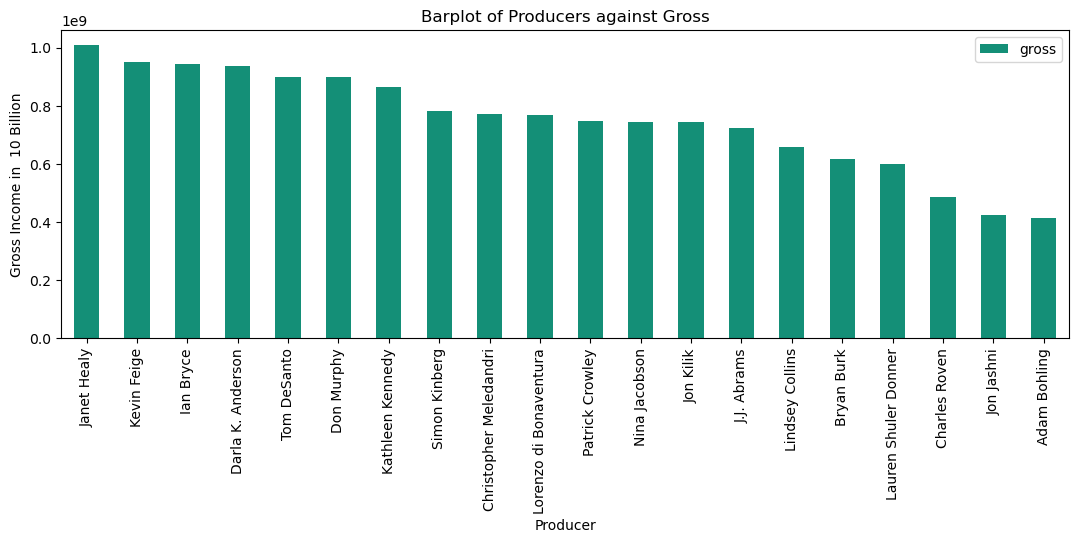

Top 10 most grossed producer are ; ['Janet Healy', 'Kevin Feige', 'Ian Bryce', 'Darla K. Anderson', 'Tom DeSanto', 'Don Murphy', 'Kathleen Kennedy', 'Simon Kinberg', 'Christopher Meledandri', 'Lorenzo di Bonaventura'] 


In [31]:
# plotting the top 20 producers with a high average gross amounts of movies 
plottings ('producer')

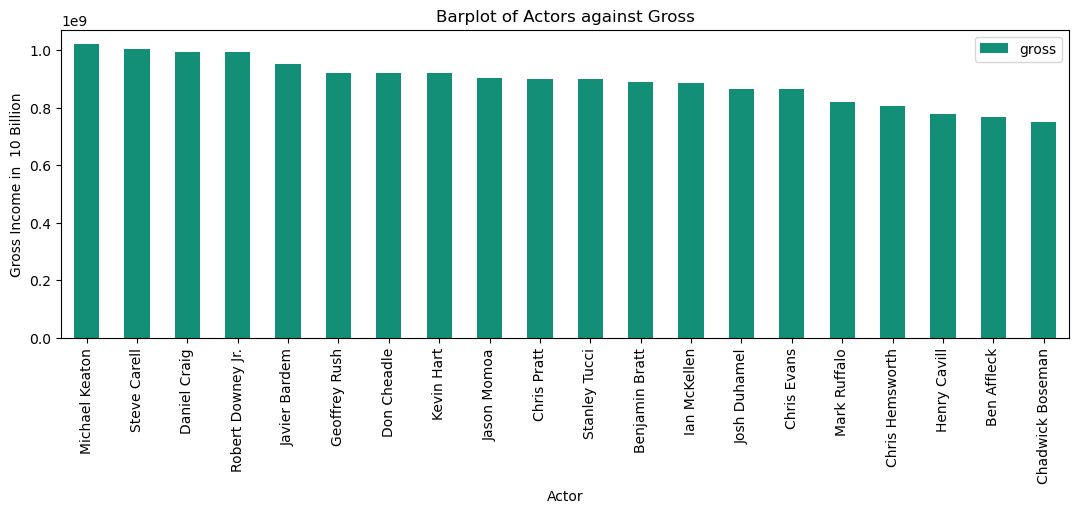

Top 10 most grossed actor are ; ['Michael Keaton', 'Steve Carell', 'Daniel Craig', 'Robert Downey Jr.', 'Javier Bardem', 'Geoffrey Rush', 'Don Cheadle', 'Kevin Hart', 'Jason Momoa', 'Chris Pratt'] 


In [32]:
# plotting the top 20 actors with a high average gross amounts of movies 
plottings ('actor')

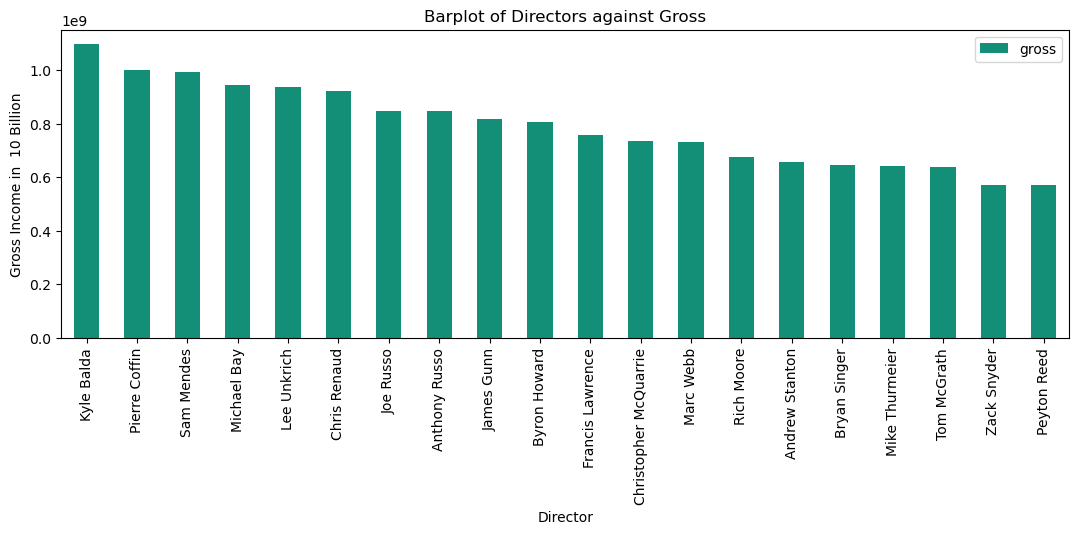

Top 10 most grossed director are ; ['Kyle Balda', 'Pierre Coffin', 'Sam Mendes', 'Michael Bay', 'Lee Unkrich', 'Chris Renaud', 'Joe Russo', 'Anthony Russo', 'James Gunn', 'Byron Howard'] 


In [33]:
# plotting the top 20 directors with a high average gross amounts of movies 
plottings ('director')

From the above analysis and barplots, we can conclude that according to the identified genres in problem one:-
> The top 10 best producers are ; <font color= #C0392B > Janet Healy , Kevin Feige , Ian Bryce , Darla K. Anderson , Tom DeSanto , Don Murphy , Kathleen Kennedy , Simon Kinberg , Christopher Meledandri and Lorenzo di Bonaventura </font>

> Top top 10 best directors are: <font color = #C0392B>Kyle Balda , Pierre Coffin , Sam Mendes , Brad Bird , Michael Bay , Lee Unkrich , Chris Renaud , Anthony Russo , Joe Russo and James Gunn</font>

>Top top 10 best actors are: <font color = #C0392B>Michael Keaton , Steve Carell , Robert Downey Jr. , Javier Bardem , Geoffrey Rush , Don Cheadle , Kevin Hart , Jason Momoa , Chris Pratt and Stanley Tucci</font>

### 3: Top Movie Production Studios that produce high gross  movies

In the analysis of this business question, we are going to use the `movie_gross_basics` table


In [34]:
#previewing the table
print(movie_gross_basics.shape)
movie_gross_basics.head()

(2019, 6)


,title,studio,gross,movie_id,runtime_minutes,genres
0,Toy Story 3,BV,1.067000e+09,tt0435761,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,8.283000e+08,tt1375666,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,7.526000e+08,tt0892791,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,6.985000e+08,tt1325004,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,6.239000e+08,tt1228705,124.0,"Action,Adventure,Sci-Fi"


In [35]:
# we are goin to create a question_3 df tha only contains the filtered genre
# genres ontained in question one

question_3 = movie_gross_basics[movie_gross_basics.genres.isin(genres_picked)]

In [36]:
# then we are goung to pick studios with more than 5 produced movies
studios=question_3.studio.value_counts()

studios[studios> 5]
# we are assigning their names to a studio_names variable
studio_names=list(studios[studios> 5 ].index)
studio_names

['BV', 'Fox', 'WB', 'Uni.', 'Sony', 'Par.', 'LGF', 'LG/S']

In [37]:
# the we group the question_3 df according to studio names together with mean aggregate function


grouped_3=question_3[ question_3.studio.isin(studio_names) ].groupby('studio')[['gross']].mean()

# then orders the result in descending order and selects the top 10 rows of the output
grouped_3=grouped_3.sort_values(['gross'],ascending=False)[:10]
grouped_3

,gross
studio,
BV,6.582841e+08
WB,4.838190e+08
Uni.,4.570101e+08
Par.,4.429115e+08
Sony,4.334900e+08
Fox,4.019857e+08
LGF,3.432667e+08
LG/S,1.575000e+08


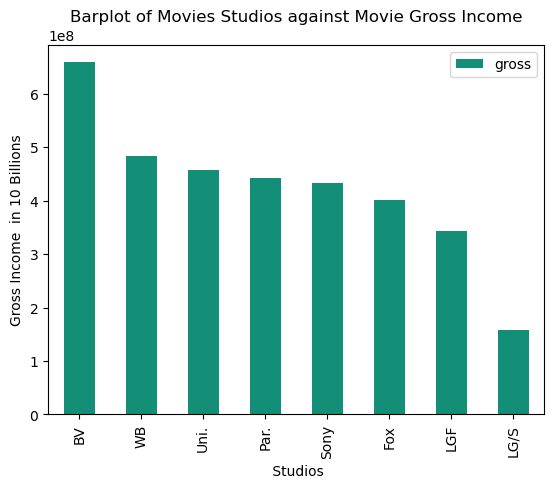

In [38]:
# then plots the grouped data to a barplot

grouped_3.plot( kind='bar', color='#148F77')
plt.title('Barplot of Movies Studios against Movie Gross Income')
plt.xlabel(" Studios")
plt.ylabel('Gross Income  in 10 Billions')
plt.show()

From the above plot,the top 8 best movie producing studios that have produced more than 5 films are:
- BV   - Buena Vista Pictures AKA ( Walt Disney Studios Motion Pictures)
- WB   -   Warner Bros. Entertainment 
- Uni.   -   Universal Pictures
- Par.   -   Paramaount Pictures
- Sony   -   Sony Pictures
- Fox   -   20th Century Studio AKA Fox Studio
- LGF   -   Lions Gate Entertainment Corporation
- LG/S   -   Gaumont Film Company 

## Conclusions


- The top most selling movie types / mixed-genres are; 
     - Action, Adventure, Sci-fi
     - Action, Adventure,  Fantasy
     - Action, Adventure, Thriller
     - Action, Adventure, Comedy
     - Adventure, Animation, Comedy 
     - Action, Adventure, Animation
     
- The best experienced movie producers of the above mixed-genres as per the available data were ;
    > Janet Healy , Kevin Feige , Ian Bryce , Darla K. Anderson , Tom DeSanto , Don Murphy , Kathleen Kennedy , Simon Kinberg , Christopher Meledandri and Lorenzo di Bonaventura 
    
- The best experienced movie directors as per the available data were ;
    > Kyle Balda , Pierre Coffin , Sam Mendes , Brad Bird , Michael Bay , Lee Unkrich , Chris Renaud , Anthony Russo , Joe Russo and James Gunn

- The best experienced movie actors as per the available data were are ;
    > Michael Keaton , Steve Carell , Robert Downey Jr. , Javier Bardem , Geoffrey Rush , Don Cheadle , Kevin Hart , Jason Momoa , Chris Pratt and Stanley Tucci
    
- The top best movie producing studios as per the available data were ;
    - BV   - Buena Vista Pictures AKA ( Walt Disney Studios Motion Pictures)
    - WB   -   Warner Bros. Entertainment 
    - Uni.   -   Universal Pictures
    - Par.   -   Paramaount Pictures
    - Sony   -   Sony Pictures

## Recommendations

- 1: The shoudld specialise its movie production in the following mixed-genres ; { (Action, Adventure, Sci-fi) , (Action, Adventure,  Fantasy ) , ( Action, Adventure, Thriller ) , ( Action, Adventure, Comedy) , ( Adventure, Animation, Comedy) , ( Action, Adventure, Animation ) }
***
- 2: The company should consider the list of producers for their movie productions ;  [Janet Healy , Kevin Feige , Ian Bryce , Darla K. Anderson , Tom DeSanto , Don Murphy , Kathleen Kennedy , Simon Kinberg , Christopher Meledandri and Lorenzo di Bonaventura ]
***
- 3: The company should consider the folloeing list of directors to corrdinate their movie productions ; [ Kyle Balda , Pierre Coffin , Sam Mendes , Brad Bird , Michael Bay , Lee Unkrich , Chris Renaud , Anthony Russo , Joe Russo and James Gunn ] 
***
- 4: The company should consider this list of actors to be theri lead actors during movie productions ; [ Michael Keaton , Steve Carell , Robert Downey Jr. , Javier Bardem , Geoffrey Rush , Don Cheadle , Kevin Hart , Jason Momoa , Chris Pratt and Stanley Tucci ] 
***
- 5: In case of a partneship in movie production th company should consider the folloeing list of production studios ; [ ( Walt Disney Studios Motion Pictures) , (Warner Bros. Entertainment ) , ( Universal Pictures) , (Paramaount Pictures ) , (Sony Pictures) ]